# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

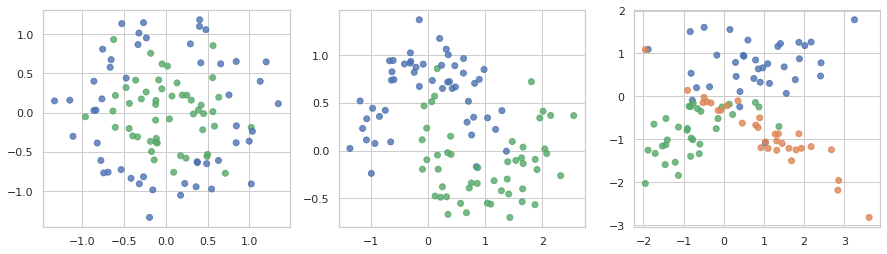

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

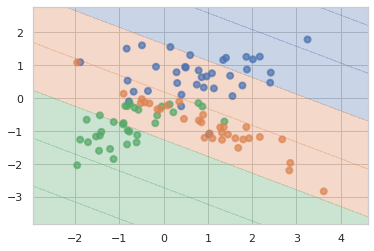

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train accuracy: 1.0
Test accuracy: 0.7666666666666667


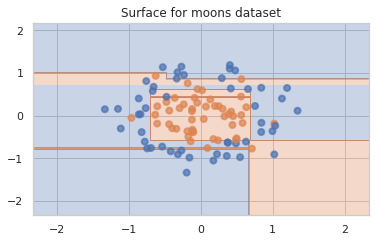

In [ ]:
def art(df):
  X,y = df 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  dt = DecisionTreeClassifier().fit(X_train, y_train)
  y_train_pred = dt.predict(X_train)
  y_test_pred = dt.predict(X_test)

  print(f'Train accuracy:', accuracy_score(y_train, y_train_pred))
  print(f'Test accuracy:', accuracy_score(y_test, y_test_pred))

  plt.title('Surface for moons dataset')
  plot_surface(dt, X, y)


art(datasets[0])

Train accuracy: 1.0
Test accuracy: 0.8666666666666667


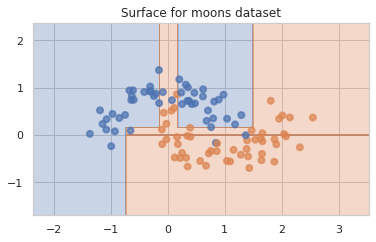

In [ ]:
art(datasets[1])

Train accuracy: 1.0
Test accuracy: 0.8


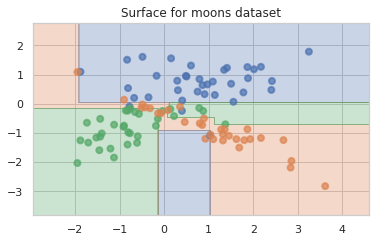

In [ ]:
art(datasets[2])

__Ответ:__ Все переобучено. Границы настолько сложные, что видно их подстроило под правильный ответ. Разница accuracy убивает, на тренировке всё супер, на тесте плачевно.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

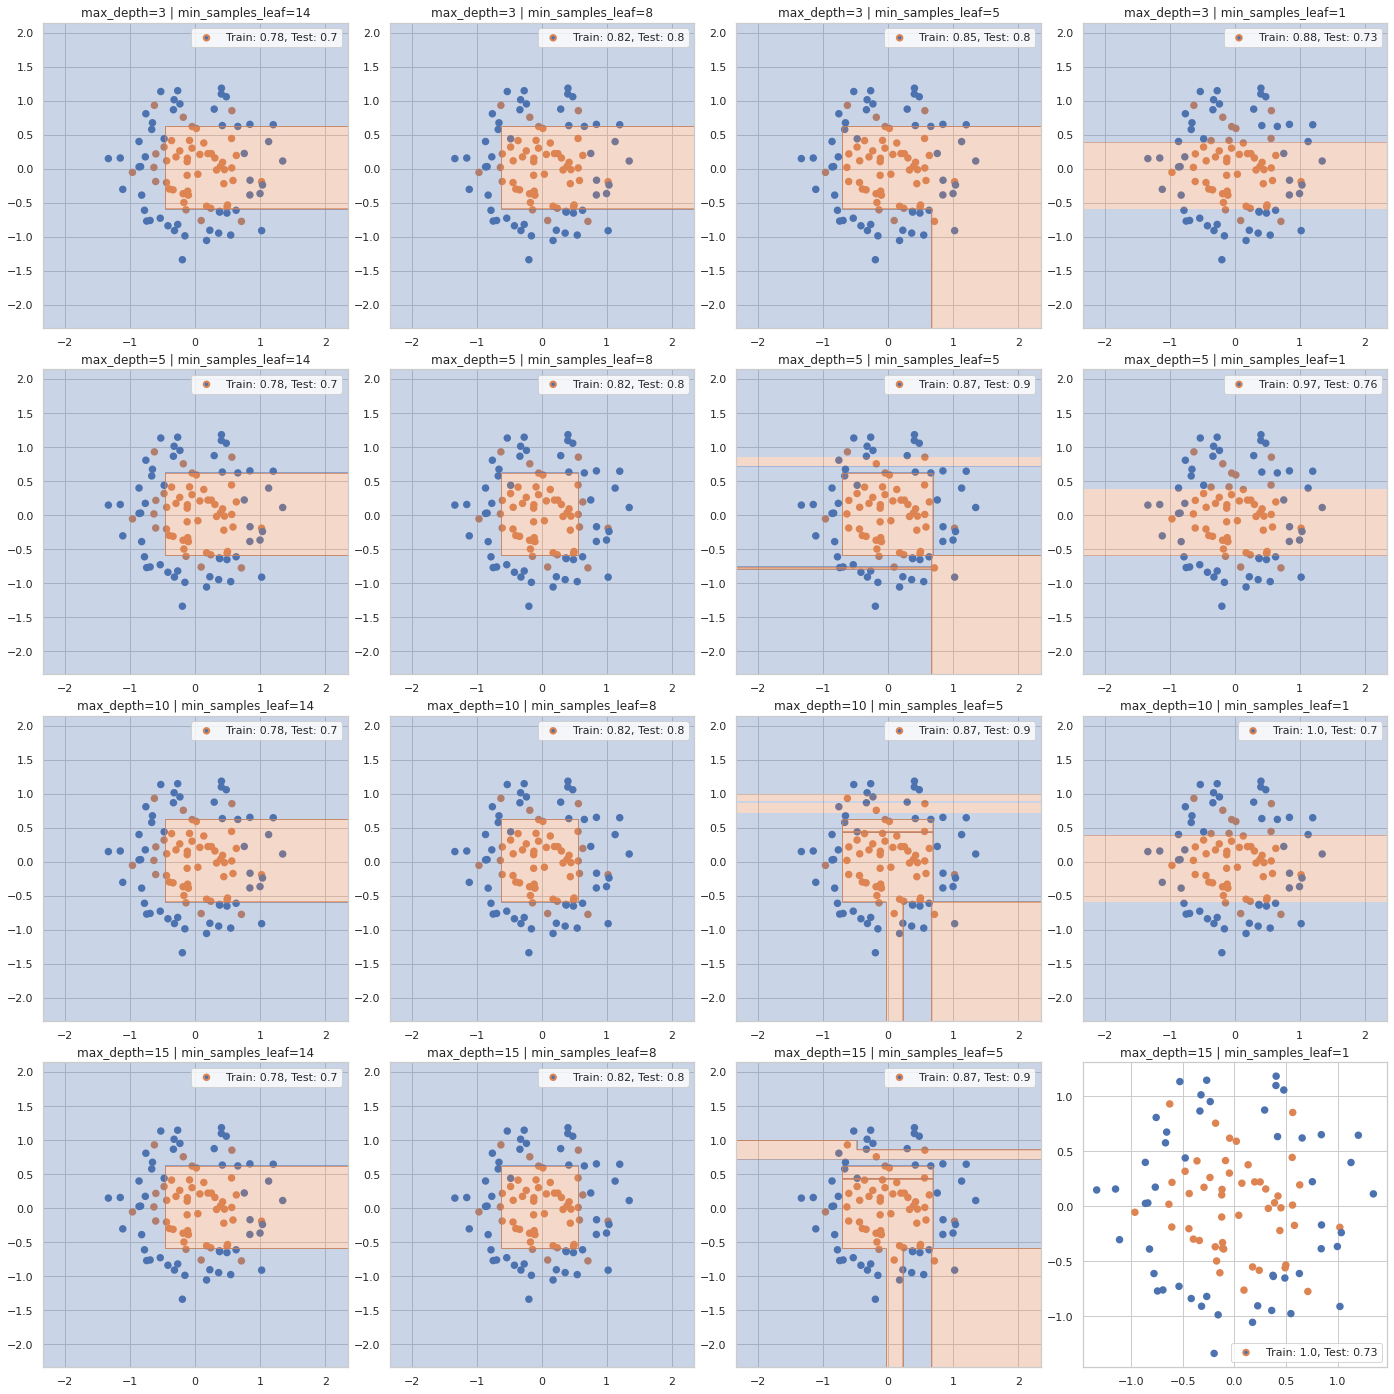

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


def see_diff_params(df):
    X, y = df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    plt.figure(figsize=(20, 20))
    for i, max_depth in enumerate([3, 5, 10, 15]):
        for j, min_samples_leaf in enumerate([14, 8, 5, 1]):
            plot_step = 0.01
            palette = sns.color_palette(n_colors=len(np.unique(y)))
            cmap = ListedColormap(palette)
            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))

            clf = DecisionTreeClassifier(max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            accuracy_train = accuracy_score(y_train, clf.predict(X_train))
            accuracy_test = accuracy_score(y_test, clf.predict(X_test))
        
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

            plt.subplot2grid((4, 4), (i, j))
            plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                        edgecolor=np.array(palette)[y], linewidths=2)
            plt.title('max_depth=' + str(max_depth) +
                      ' | min_samples_leaf=' + str(min_samples_leaf))
            plt.legend(['Train: ' + str(accuracy_train)[0:4] +
                        ', Test: ' + str(accuracy_test)[0:4]])
    plt.show()

see_diff_params(datasets[0])

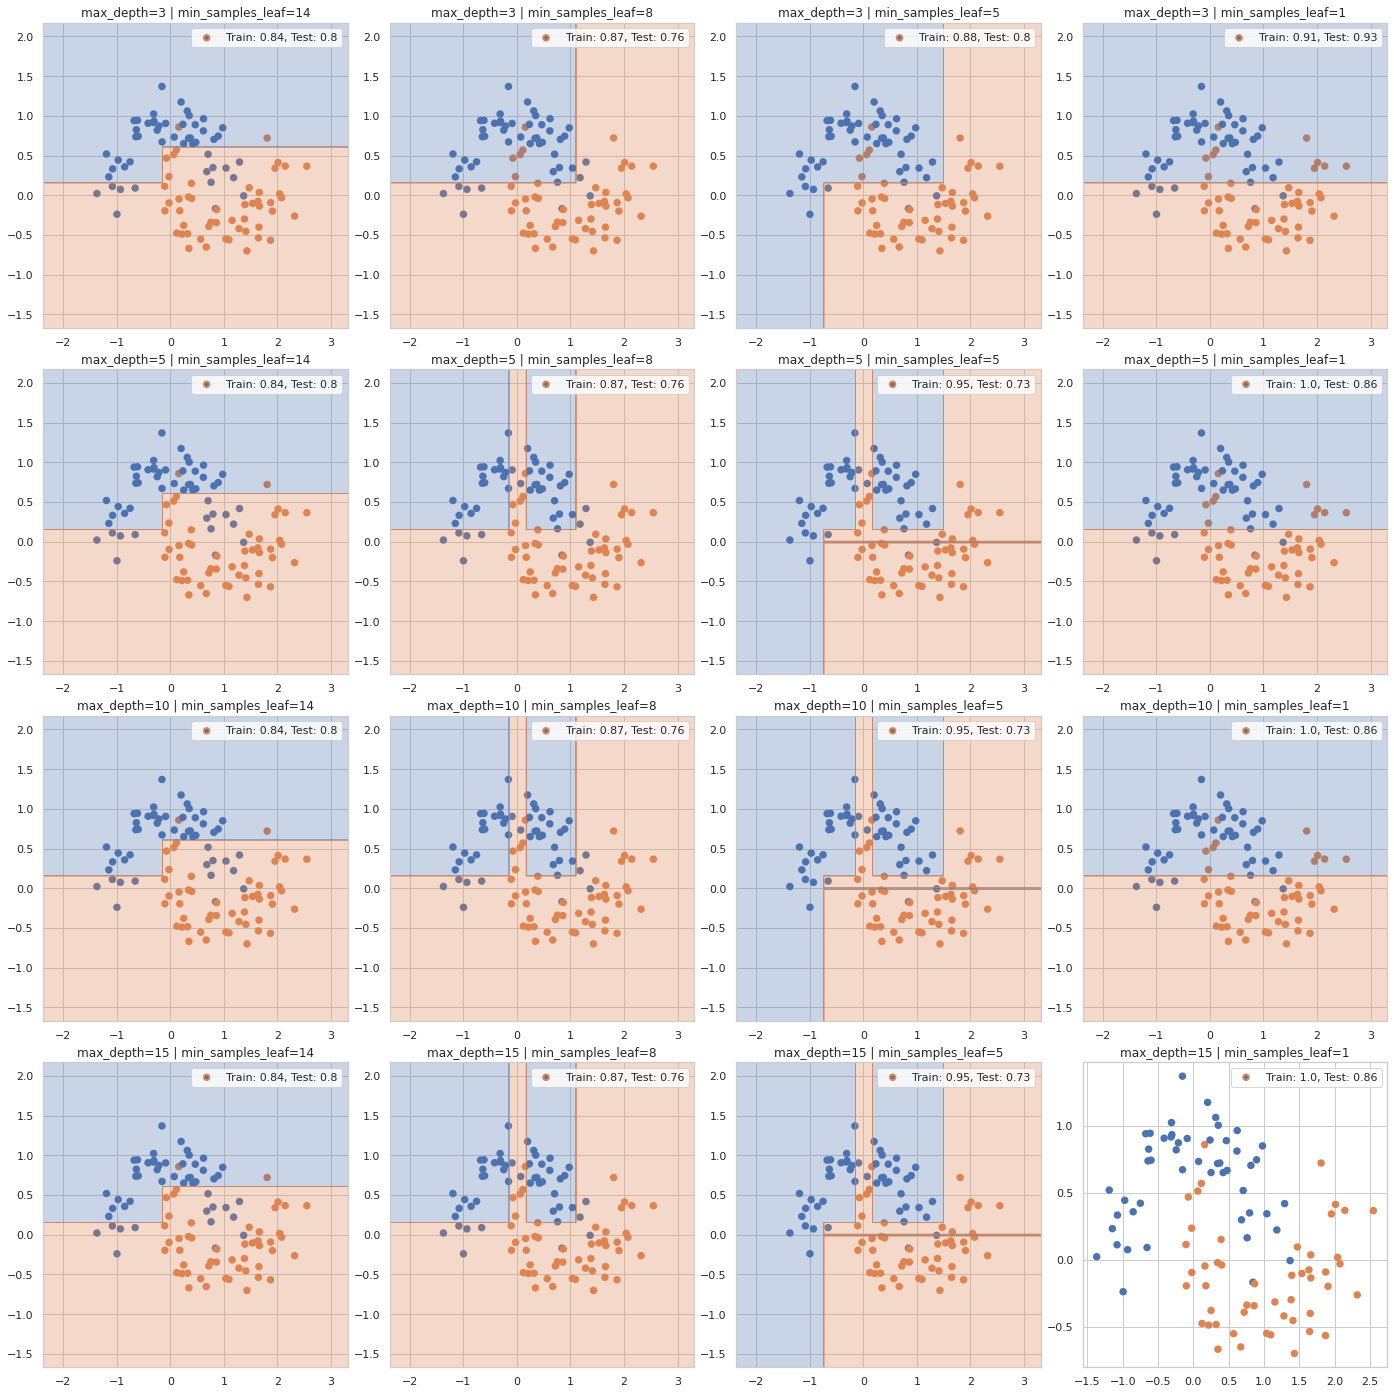

In [ ]:
see_diff_params(datasets[1])

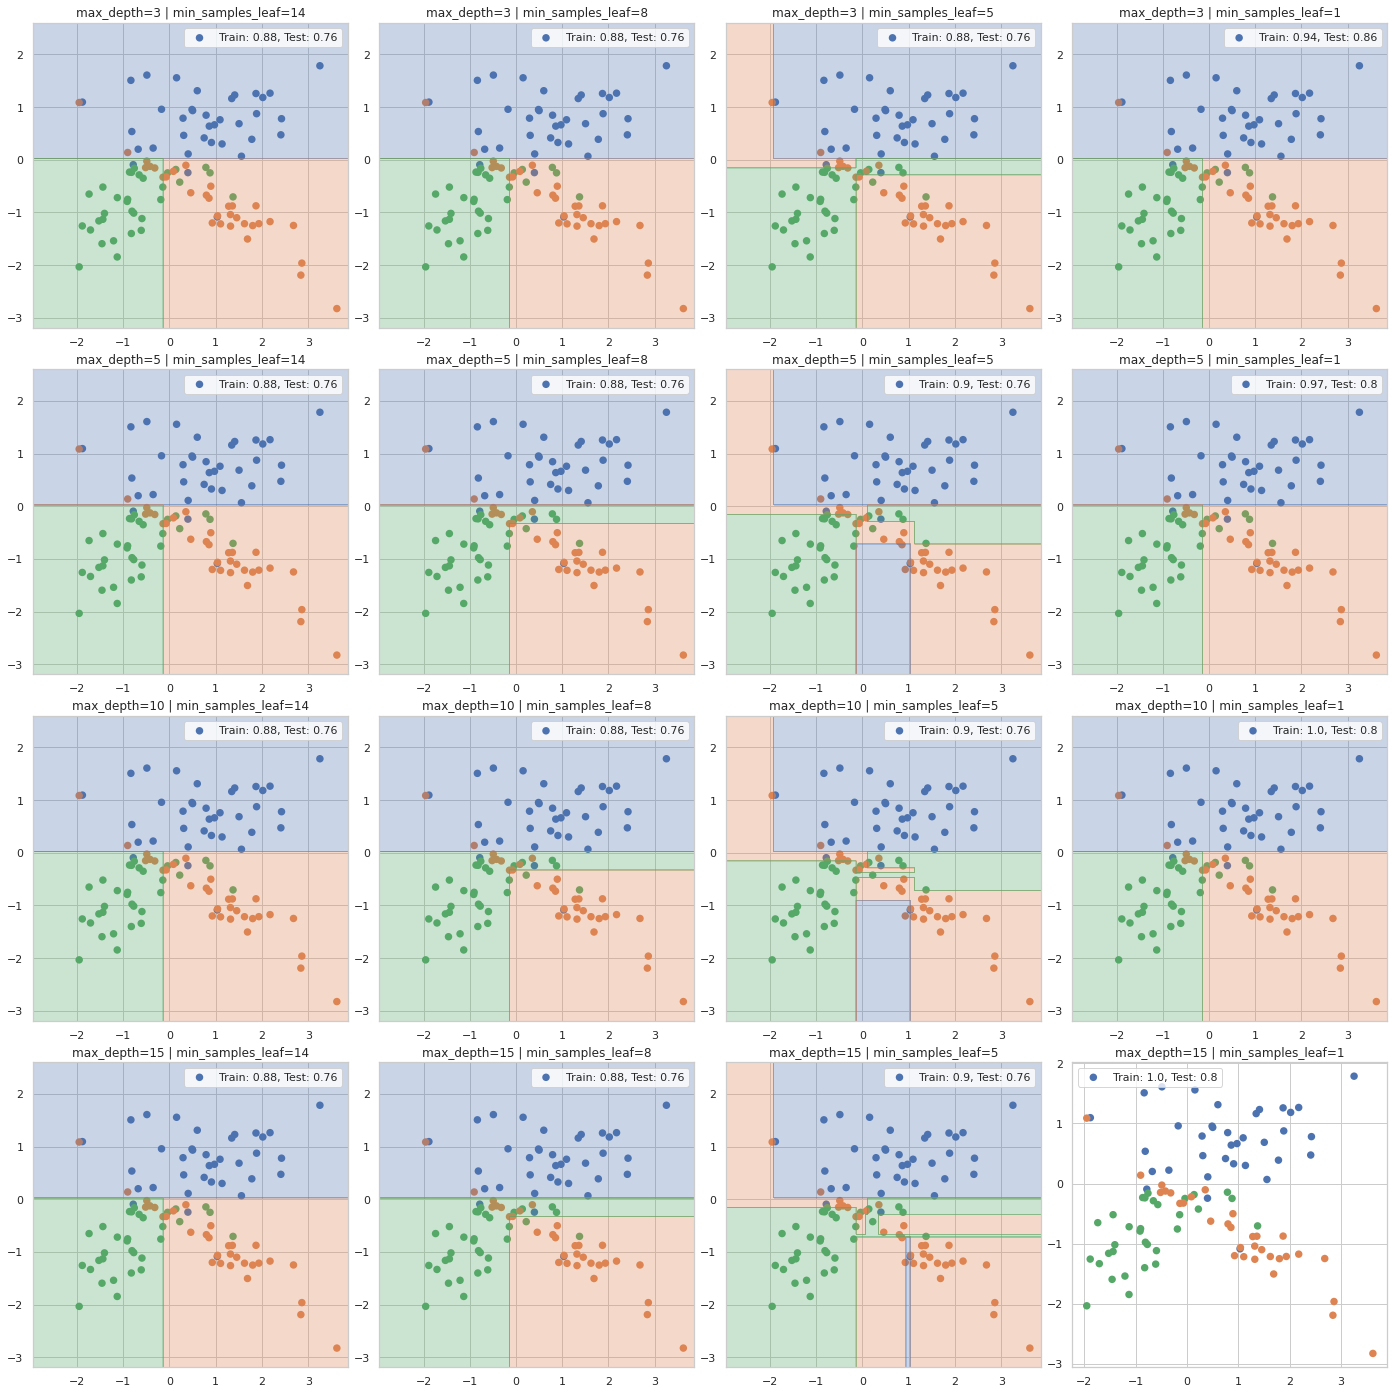

In [ ]:
see_diff_params(datasets[2])

__Ответ:__ В общем для каждого датасета нужна своя пара параметром, это  вролне логично. При этом можно сказать, что решают оба параметра, так как если один подходит, а другой нет то всё равно сталкиваемся с переобучением в виде подгонки ответов (нет толку кого-то делать очень большим или маленьким). По сути идём на ощупь к золотой середине


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/43413/run-report/79689533/

Ник скорее всего Давид Кочарян

Вот почта на всякий: drkocharyan@edu.hse.ru


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
!wget  -O 'hw5code.py' -q 'https://raw.githubusercontent.com/drkocharyan/MO1_HW_5/main/hw5code_py.py'
!wget  -O 'hw5code1.py' -q 'https://raw.githubusercontent.com/Polina1526/MO-1/master/homework-practice-05-trees/hw5code.py'

from hw5code import find_best_split

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!wget  -O 'students.csv' -q 'https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv'
data = pd.read_csv('students.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [ ]:
y = data['UNS']
X = data.drop('UNS', axis=1)

X.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


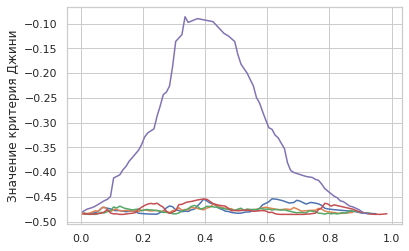

In [ ]:
for feature in X.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(
        X[feature].to_numpy(), y.to_numpy()
    )
    plt.plot(thresholds, ginis, label=feature)
plt.ylabel("Значение критерия Джини")
plt.show()

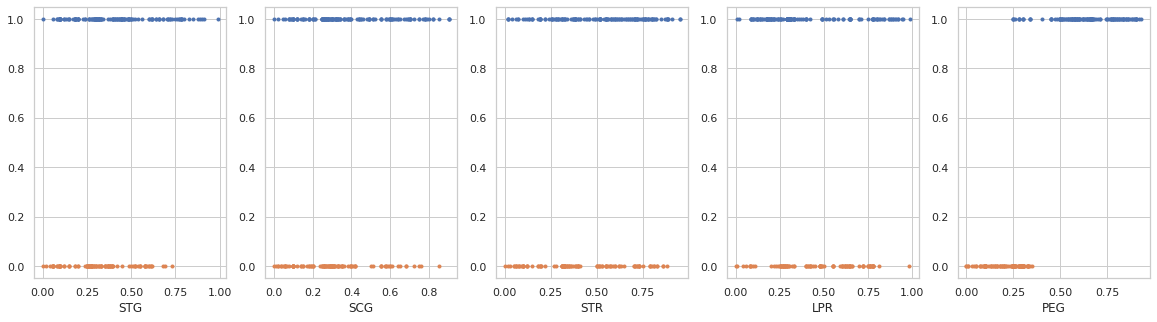

In [ ]:
fig, ax = plt.subplots(1, 5 , figsize = (20,5))
features = ["STG", "SCG", "STR", "LPR", "PEG"]

target_mask = (y == 1)
for i, feature in enumerate(features):
    ax[i].scatter(x=X.loc[target_mask, feature], y=y[target_mask], s=9)
    ax[i].scatter(x=X.loc[~target_mask, feature], y=y[~target_mask], s=9)
    ax[i].set_xlabel(feature)


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** На PEG идеально видно, деление на правое/левое, что как раз нужно для дерева. scatter говорят PEG, согласуется.

"Хорошие" кривые должны иметь явные перепады, то есть чёткие максимумы. В противорложность им худшие это, что близки к константам, по ним особо не поделишь. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [ ]:
from hw5code import DecisionTree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
dt = DecisionTree(['categorical'] * 5)
dt.fit(X_train.values, y_train.values)
pred_train = dt.predict(X_train.values)
pred_test = dt.predict(X_train.values)

In [ ]:
X

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58
254,0.78,0.61,0.71,0.19,0.60
255,0.54,0.82,0.71,0.29,0.77
256,0.50,0.75,0.81,0.61,0.26


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

!wget  -O 'agaricus-lepiota.data' -q 'https://raw.githubusercontent.com/drkocharyan/MO1_HW_5/main/agaricus-lepiota.data'
data = pd.read_csv('agaricus-lepiota.data')
X = data.drop('p', axis=1)
y = data['p']
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


Выглядит не особо численными, пусть всё будет категориальным. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_encoder = OrdinalEncoder()
X_train = X_encoder.fit_transform(X_train)
X_test = X_encoder.transform(X_test)

y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)

In [ ]:
dt = DecisionTree(['categorical'] * X.shape[1])
dt.fit(X_train, y_train)
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)
print(f'Train accuracy: %.4f' % accuracy_score(pred_train, y_train))
print(f'Test accuracy: %.4f' % accuracy_score(pred_test, y_test))

Train accuracy: 1.0000
Test accuracy: 1.0000


Так ладно, тут два расклада, либо я накосячил да так хорошенько, либо это победа при чём тотальная. К завтрашнему дню нужно сделать ещё 4 дедлайна, потому верю в чудо)


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: